In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline 
# for showing chart

In [4]:
df = pd.read_csv('Mall_Customers.csv')

In [5]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [6]:
df.rename(columns={'Gender' : 'gender','Age': 'age','Annual Income (k$)': 'income','Spending Score (1-100)':'score'},inplace=1)

In [7]:
df

,CustomerID,gender,age,income,score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [8]:
df.shape

(200, 5)

In [9]:
df.isnull().sum()

CustomerID    0
gender        0
age           0
income        0
score         0
dtype: int64

In [11]:
df.isnull().values.any()

False

In [12]:
df.describe()

,CustomerID,age,income,score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


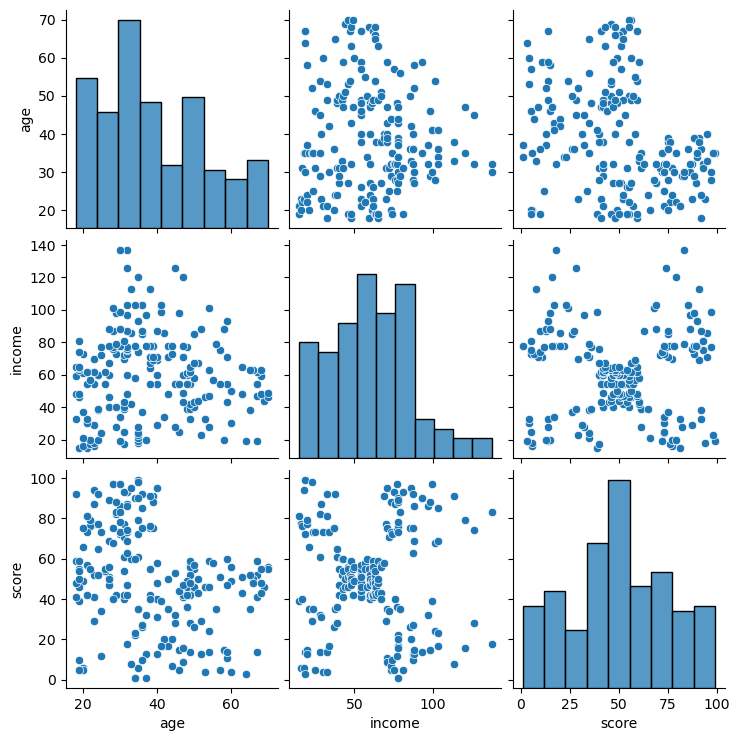

In [14]:
seaborn.pairplot(df[['age','income','score']])

In [15]:
import sklearn.cluster as cluster

In [17]:
kmeans = cluster.KMeans(n_clusters=5)

In [18]:
kmeans = kmeans.fit(df[['score','income']])

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [19]:
kmeans.cluster_centers_

array([[49.51851852, 55.2962963 ],
       [79.36363636, 25.72727273],
       [82.12820513, 86.53846154],
       [20.91304348, 26.30434783],
       [17.11428571, 88.2       ]])

In [20]:
df['income_clusters'] = kmeans.labels_

In [21]:
df

,CustomerID,gender,age,income,score,income_clusters
0,1,Male,19,15,39,3
1,2,Male,21,15,81,1
2,3,Female,20,16,6,3
3,4,Female,23,16,77,1
4,5,Female,31,17,40,3
...,...,...,...,...,...,...
195,196,Female,35,120,79,2
196,197,Female,45,126,28,4
197,198,Male,32,126,74,2
198,199,Male,32,137,18,4


In [22]:
df['income_clusters'].value_counts()

0    81
2    39
4    35
3    23
1    22
Name: income_clusters, dtype: int64

<Axes: xlabel='income', ylabel='score'>

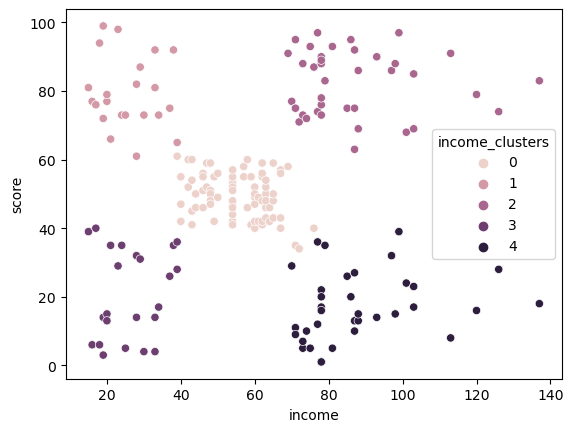

In [25]:
seaborn.scatterplot(x='income', y = 'score', hue='income_clusters', data = df)

In [26]:
kmeans = cluster.KMeans(n_clusters=2)

In [27]:
kmeans = kmeans.fit(df[['age','score']])

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [28]:
kmeans.cluster_centers_

array([[28.95294118, 73.62352941],
       [46.16521739, 32.88695652]])

In [29]:
df['age_clusters'] = kmeans.labels_

In [30]:
df['age_clusters'].value_counts()

1    115
0     85
Name: age_clusters, dtype: int64

In [31]:
df

,CustomerID,gender,age,income,score,income_clusters,age_clusters
0,1,Male,19,15,39,3,1
1,2,Male,21,15,81,1,0
2,3,Female,20,16,6,3,1
3,4,Female,23,16,77,1,0
4,5,Female,31,17,40,3,1
...,...,...,...,...,...,...,...
195,196,Female,35,120,79,2,0
196,197,Female,45,126,28,4,1
197,198,Male,32,126,74,2,0
198,199,Male,32,137,18,4,1


<Axes: xlabel='age', ylabel='score'>

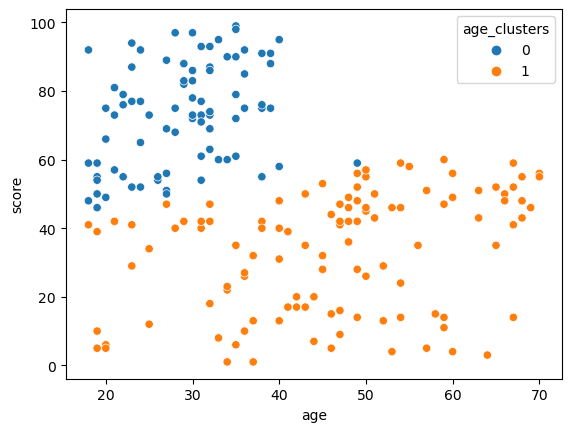

In [32]:
seaborn.scatterplot(x='age', y = 'score', hue='age_clusters', data = df)